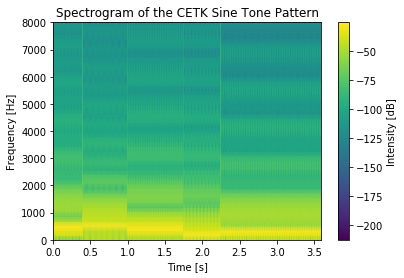

In [3]:
import numpy as np
from scipy.io import wavfile
from scipy.signal import spectrogram
import matplotlib.pyplot as plt
from IPython.display import Audio

Fs = 44100  # Sampling rate (same as used in Project 1)

tone_durations = [0.4, 0.6, 0.75, 0.5, 1.35]  # Duration of each tone in seconds

frequencies = [466.16, 523.25, 415.30, 207.65, 311.13]  # Frequencies for B flat, C, A flat, Lower Octave A flat, E flat

cetk_signal = np.array([])

for freq, tone_duration in zip(frequencies, tone_durations):
    t = np.linspace(0, tone_duration, int(Fs * tone_duration), endpoint=False)
    tone = np.sin(2 * np.pi * freq * t)
    cetk_signal = np.concatenate([cetk_signal, tone])

wavfile.write("CharpPinaWest-cetk.wav", Fs, (cetk_signal * 32767).astype(np.int16))

%matplotlib inline

frequencies, times, Sxx = spectrogram(cetk_signal, Fs)
plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')
plt.title('Spectrogram of the CETK Sine Tone Pattern')
plt.colorbar(label='Intensity [dB]')
plt.ylim(0, 8000)  
plt.show()
